In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage", image_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=BATCH_SIZE, shuffle=True)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

Potato___Early_blight


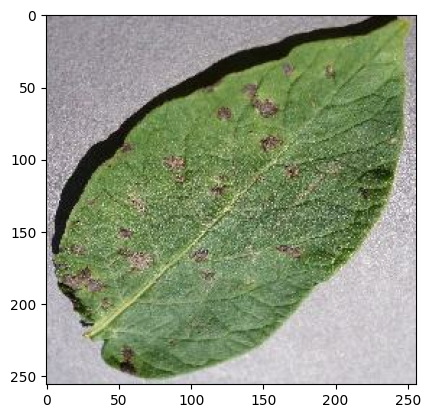

In [12]:
for img, labels in dataset.take(1):
    plt.imshow(img[0].numpy().astype("uint8"))
    print(class_names[labels[0].numpy()])

BUILDING TRAIN AND TEST SET

In [15]:
def developing_train_test_set(ds, train_size=0.8, val_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):
    total_len=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    
    
    train_len=int(total_len*train_size)
    val_len=int(total_len*val_size)
    test_len=int(total_len*test_size)
    
    train_ds=ds.take(train_len)
    val_ds=ds.skip(train_len).take(val_len)
    test_ds=ds.skip(train_len+val_len)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds ,test_ds=developing_train_test_set(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8